Hypothesis:
Numerical modeling can approximate the actual fluctuation in $CO_2$ levels in Alaskan rivers.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
from scipy import optimize

In [2]:
ghg = pd.read_csv("Dissolved_GHG.csv")
ghg = ghg.replace(-9999.00, np.nan)
ghg = ghg.set_index(ghg.id)
ghg['date'] = pd.to_datetime(ghg["date"])
ghg

,#,id,location,river,latitude,longitude,date,season,discharge,co2,co2_f14c,co2_f14c_sd,co2_d13c,co2_d13c_sd,ch4,ch4_f14c,ch4_f14c_sd,ch4_d13c,ch4_d13c_sd
id,,,,,,,,,,,,,,,,,,,
SAG22-01,1,SAG22-01,Atigun Bridge,Atigun,68.4519,-149.3744,2022-06-05,Spring,24.95,6.542,0.803,0.001,-12.623,0.1,0.232,0.834,0.001,-59.277,0.1
SAG22-03,2,SAG22-03,Mining Area,Sagavanirktok,68.7695,-148.8492,2022-06-06,Spring,NaN,6.307,0.822,0.001,-12.824,0.1,0.031,1.178,0.038,NaN,NaN
SAG22-07,3,SAG22-07,USGS gaging sation near pump 3,Sagavanirktok,69.0161,-148.8203,2022-06-07,Spring,136.49,6.610,0.740,0.001,-13.167,0.1,0.008,0.989,0.013,NaN,NaN
SAG22-09,4,SAG22-09,Happy Valley,Sagavanirktok,69.1486,-148.8247,2022-06-07,Spring,NaN,NaN,0.737,0.001,-12.235,0.1,NaN,1.021,0.059,NaN,NaN
SAG22-15,5,SAG22-15,Spur Dike 3,Sagavanirktok,69.9612,-148.7187,2022-06-08,Spring,NaN,5.099,NaN,NaN,NaN,NaN,0.014,NaN,NaN,NaN,NaN
SAG22-17,6,SAG22-17,Endicott Bridge,Sagavanirktok,70.2484,-148.3033,2022-06-09,Spring,NaN,7.740,0.793,0.001,-12.799,0.1,0.046,0.996,0.003,NaN,NaN
KUP22-01,7,KUP22-01,Kuparuk River Delta,Kuparuk,70.3307,-149.0084,2022-06-09,Spring,234.18,8.252,0.926,0.001,-13.977,0.1,0.097,0.974,0.002,NaN,NaN
SAG22-19,8,SAG22-19,Atigun Bridge,Atigun,68.4519,-149.3744,2022-07-15,Summer,19.96,4.844,0.812,0.002,-12.591,0.1,0.306,0.846,0.001,-57.375,0.1
SAG22-20,9,SAG22-20,Mining Area,Sagavanirktok,68.7695,-148.8492,2022-07-16,Summer,NaN,6.305,0.792,0.001,-13.311,0.1,0.004,1.068,0.020,NaN,NaN


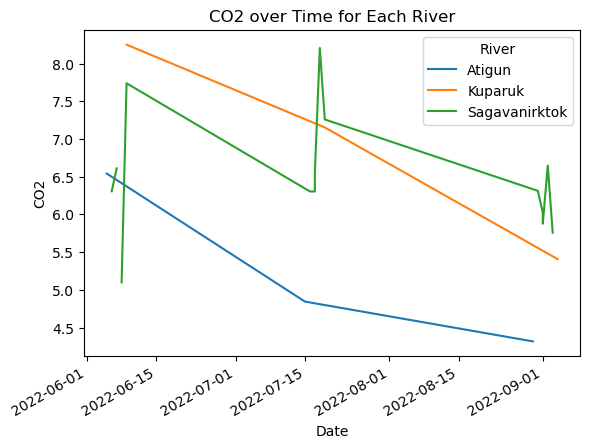

In [3]:
for name, group in ghg.groupby("river"):
    group.plot(x="date", y="co2", ax=plt.gca(), label=name) 

plt.xlabel("Date")
plt.ylabel("CO2")
plt.title("CO2 over Time for Each River")
plt.legend(title="River")
plt.show()


In [4]:
kuparuk = ghg[ghg.river == "Kuparuk"]
sag = ghg[ghg.river == "Sagavanirktok"]
atigun = ghg[ghg.river == "Atigun"]

Text(0, 0.5, '$CH_4/^{14}C$')

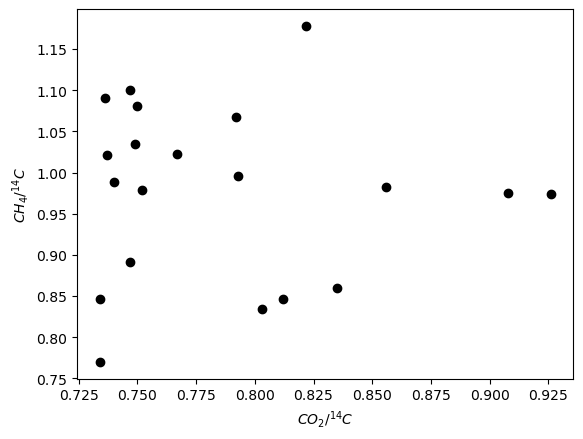

In [5]:
fig = plt.figure()
ax = plt.subplot(1,1,1)
plt.plot(ghg["co2_f14c"], ghg["ch4_f14c"], 'ko')
plt.xlabel('$CO_2/^{14}C$')
plt.ylabel('$CH_4/^{14}C$')

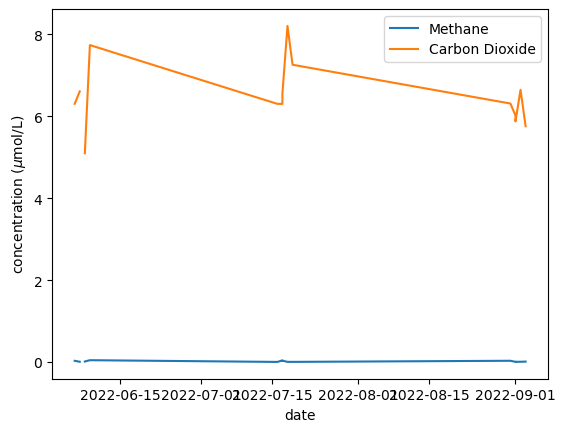

In [7]:
# analyze trends in greenhouse gas levels over time
fig = plt.figure()
ax = plt.subplot(1,1,1)
plt.plot(sag["date"], sag["ch4"], label = "Methane")
plt.plot(sag["date"], sag["co2"], label = "Carbon Dioxide")
plt.xlabel('date')
plt.ylabel('concentration ($\mu$mol/L)')
plt.legend()

Text(0, 0.5, 'Latitude')

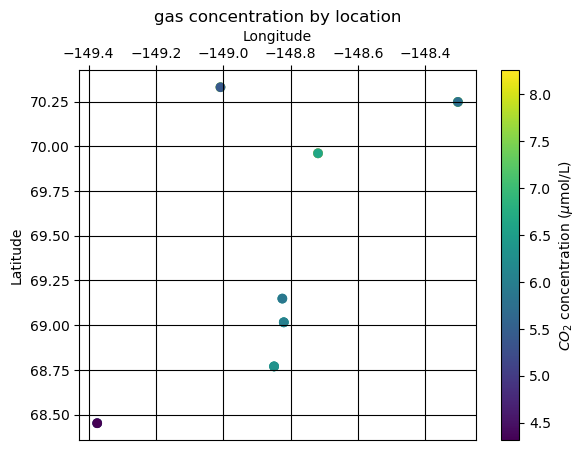

In [8]:
#Scatter plot or heatmap of gas concentrations at different locations along the rivers
plt.scatter(ghg["longitude"], ghg["latitude"], c = ghg["co2"])
plt.grid(True, c = "black")
plt.colorbar(label = "$CO_2$ concentration ($\mu$mol/L)")
plt.gca().xaxis.set_ticks_position("top")
plt.gca().xaxis.set_label_position("top")
plt.title("gas concentration by location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

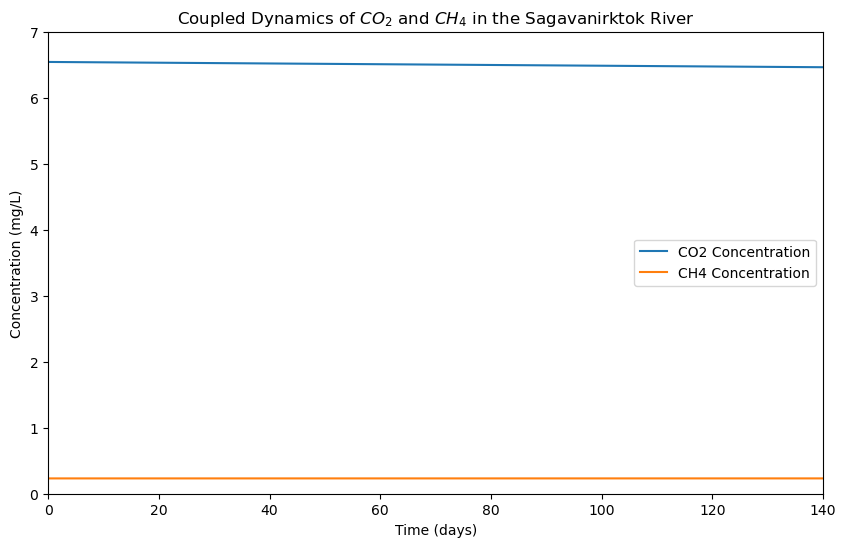

In [49]:
def co2_ch4_dynamics(t, y, Q_in, V, P_co2, P_ch4, k_ox, k_g_co2, k_g_ch4, C_atm_co2, C_atm_ch4, C_in_co2, C_in_ch4):
    C_co2, C_ch4 = y  # Unpack the variables (CO2 and CH4)

    # CO2 dynamics
    inflow_co2 = (Q_in / V) * (C_in_co2 - C_co2)
    production_co2 = P_co2 / V
    oxidation_co2 = k_ox / V * C_ch4
    gas_exchange_co2 = k_g_co2 / V * (C_co2 - C_atm_co2)
    dC_co2_dt = inflow_co2 + production_co2 + oxidation_co2 - gas_exchange_co2

    # CH4 dynamics
    inflow_ch4 = (Q_in / V) * (C_in_ch4 - C_ch4)
    production_ch4 = P_ch4 / V
    oxidation_ch4 = -k_ox / V * C_ch4
    gas_exchange_ch4 = k_g_ch4 / V * (C_ch4 - C_atm_ch4)
    dC_ch4_dt = inflow_ch4 + production_ch4 + oxidation_ch4 - gas_exchange_ch4

    return [dC_co2_dt, dC_ch4_dt]

# Parameters
Q_in = ghg["discharge"].mean()  # Average inflow rate
V = 1e6  # m³ (volume of water body)
P_co2 = 20  # mg/L/day (CO2 production rate)
P_ch4 = 5  # mg/L/day (CH4 production rate)
k_ox = 1  # CH4 oxidation rate (day⁻¹)
k_g_co2 = 0.5  # Gas exchange coefficient for CO2 (day⁻¹)
k_g_ch4 = 0.3  # Gas exchange coefficient for CH4 (day⁻¹)
C_atm_co2 = 0.4  # Atmospheric CO2 concentration (mg/L)
C_atm_ch4 = 0.01  # Atmospheric CH4 concentration (mg/L)
C_in_co2 = 1.0  # Inflow CO2 concentration (mg/L)
C_in_ch4 = 0.2  # Inflow CH4 concentration (mg/L)

# Initial conditions
C_co2_0 = sag.co2.iloc[0]  # Initial CO2 concentration (mg/L)
C_ch4_0 = sag.ch4.iloc[0]  # Initial CH4 concentration (mg/L)
y0 = [C_co2_0, C_ch4_0]  # Initial state

# Time parameters
t0 = 0 
tmax = 150
Dt = 10
t = np.arange(t0, tmax, Dt)  # Time evaluation points

# Solve the system
solution = solve_ivp(
    co2_ch4_dynamics,
    t_span=[t0, tmax],
    y0=y0,
    args=(Q_in, V, P_co2, P_ch4, k_ox, k_g_co2, k_g_ch4, C_atm_co2, C_atm_ch4, C_in_co2, C_in_ch4),
    t_eval=t,
    method="RK45"
)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t_values, co2_values, label="CO2 Concentration")
plt.plot(t_values, ch4_values, label="CH4 Concentration")
plt.xlabel("Time (days)")
plt.axis([t0,140, 0,7])
plt.ylabel("Concentration (mg/L)")
plt.title("Coupled Dynamics of $CO_2$ and $CH_4$ in the Sagavanirktok River")
plt.legend()
plt.show()

In [50]:
co2 = sag.co2.dropna()
ch4 = sag.ch4.dropna()
def quarfunc(x,a,b,c,d,e):
    y = a*x**4 + b*x**3 + c*x**2 + d*x + e
    return y
    
t_ez = np.arange(t0,140,10)

mest_ez_co2 = optimize.curve_fit(quarfunc, xdata = t_ez, ydata = co2)[0]
mest_ez_ch4= optimize.curve_fit(quarfunc, xdata = t_ez, ydata = ch4)[0]
mest_ez
co2_y = mest_ez_co2[0] * t_ez**4 + mest_ez_co2[1] * t_ez **3 + mest_ez_co2[2] * t_ez **2 + mest_ez_co2[3] * t_ez + mest_ez_co2[4]
ch4_y = mest_ez_ch4[0] * t_ez**4 + mest_ez_ch4[1] * t_ez **3 + mest_ez_ch4[2] * t_ez **2 + mest_ez_ch4[3] * t_ez + mest_ez_ch4[4]

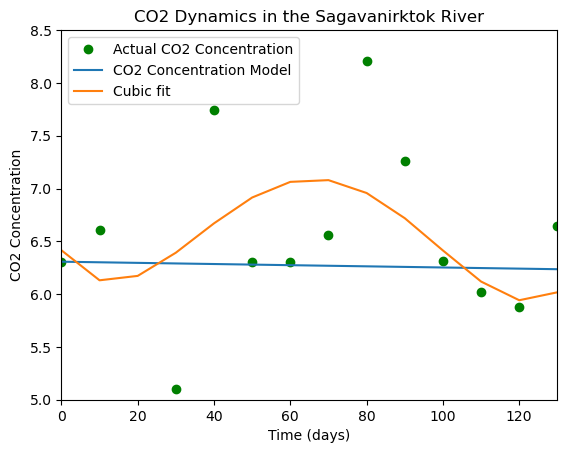

In [51]:
plt.plot(solution.t, sag.co2, 'go', label = "Actual CO2 Concentration")
plt.plot(solution.t, solution.y[0], label="CO2 Concentration Model")
plt.plot(t_ez, co2_y, label = "Cubic fit")
plt.axis([t0,130, 5,8.5])
plt.xlabel("Time (days)")
plt.ylabel("CO2 Concentration")
plt.title("CO2 Dynamics in the Sagavanirktok River")
plt.legend()
plt.show()

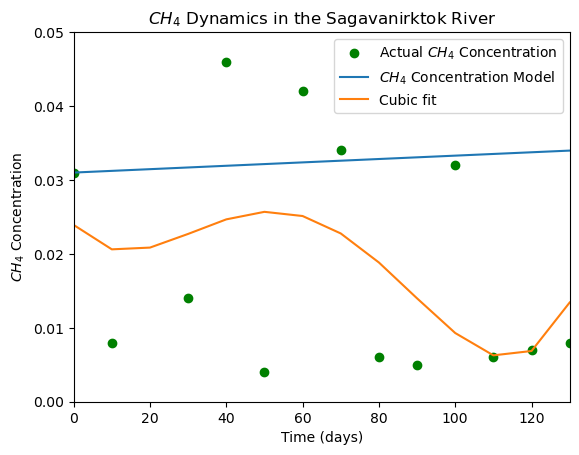

In [52]:
plt.plot(solution.t, sag.ch4, 'go', label = "Actual $CH_4$ Concentration")
plt.plot(solution.t, solution.y[1], label="$CH_4$ Concentration Model")
plt.plot(t_ez, ch4_y, label = "Cubic fit")
plt.axis([t0,130, 0,0.05])
plt.xlabel("Time (days)")
plt.ylabel("$CH_4$ Concentration")
plt.title("$CH_4$ Dynamics in the Sagavanirktok River")
plt.legend()
plt.show()